In [ ]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

# **Preparar datos y parámetros**

In [ ]:
def get_dataset():
  img_rows = img_cols = 28
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = np.reshape(x_train.astype('float32')/255,(60000,28,28,1))
  x_test = np.reshape(x_test.astype('float32')/255,(10000,28,28,1))
  print(y_train[:5])
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  print(y_train[:5])
  y_test = tf.keras.utils.to_categorical(y_test, 10)
  return (x_train, y_train, x_test, y_test)


In [ ]:
(x_train, y_train, x_test, y_test) = get_dataset()

11493376/11490434 [==============================] - 0s 0us/step
[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


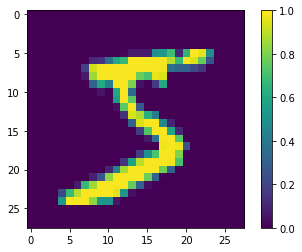

In [ ]:
def show_number(example):
  plt.figure()
  plt.imshow(np.reshape(example,(28,28)))
  plt.colorbar()
  plt.grid(False)
  plt.show()
show_number(x_train[0])

# **Definir el modelo**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

# **Entrenar el modelo**

In [ ]:
batch_size = 128
epochs = 12
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 4s 9ms/step - loss: 0.2446 - accuracy: 0.9241 - val_loss: 0.0565 - val_accuracy: 0.9822
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0871 - accuracy: 0.9743 - val_loss: 0.0400 - val_accuracy: 0.9867
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0643 - accuracy: 0.9803 - val_loss: 0.0313 - val_accuracy: 0.9894
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0314 - val_accuracy: 0.9896
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0294 - val_accuracy: 0.9898
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0321 - val_accuracy: 0.9909
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0295 - val_accuracy: 0.9913
Epoch 

# **Probar el modelo**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028972208499908447
Test accuracy: 0.9923999905586243


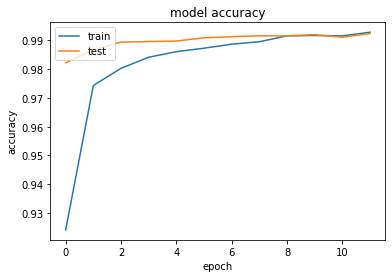

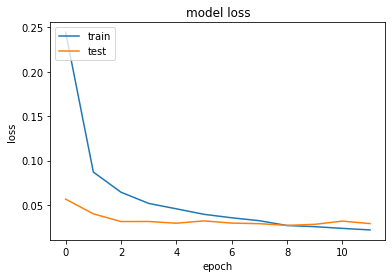

In [ ]:
# Plot del Acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot del Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def prediction(model, example):
  show_number(example)
  if example.shape != (1,28,28,1):
    example = np.reshape(example, (1,28,28,1))
  result = model.predict(example)
  return {'number':np.argmax(result),'prob':np.max(result)}

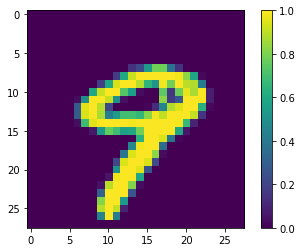

{'number': 9, 'prob': 0.9999883}

In [ ]:
prediction(model, x_test[9])

In [ ]:
model.save('./model/mi_modelo')